# Airbnb Vienna poperty listings analysis

R32NOR 2025

--- 

Packages loading

In [80]:
# packages import
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv
import json
from scipy.stats import skew, kurtosis, normaltest

In [81]:
# initial settings

# dropping warning messages
import warnings
warnings.filterwarnings('ignore')

# # Google Drive mount
# from google.colab import drive
# drive.mount('/content/drive')

In [82]:
# Pandas settings
# display settings
pd.options.display.max_columns = None

pd.options.display.max_rows = 10
# pd.set_option('display.max_rows',None)

pd.options.mode.copy_on_write = True

## Data exploration

### Dataset loading

In [83]:
# dataset load
url = "https://data.insideairbnb.com/austria/vienna/vienna/2024-09-11/data/listings.csv.gz"
rawdata = pd.read_csv(url, encoding="utf-8")

In [84]:
# raw data size and information
print(rawdata.shape)
print('\n')
rawdata.info()

(14396, 75)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            14396 non-null  int64  
 1   listing_url                                   14396 non-null  object 
 2   scrape_id                                     14396 non-null  int64  
 3   last_scraped                                  14396 non-null  object 
 4   source                                        14396 non-null  object 
 5   name                                          14396 non-null  object 
 6   description                                   13885 non-null  object 
 7   neighborhood_overview                         7339 non-null   object 
 8   picture_url                                   14396 non-null  object 
 9   host_id                                       1

In [85]:
rawdata.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,38768,https://www.airbnb.com/rooms/38768,20240911015603,2024-09-11,city scrape,central cityapartement- wifi- nice neighbourhood,39m² apartment with beautiful courtyard of the...,the Karmeliterviertel became very popular in t...,https://a0.muscache.com/pictures/ad4089a3-5355...,166283,https://www.airbnb.com/users/show/166283,Hannes,2010-07-14,"Vienna, Austria",I am open minded and like travelling myself. I...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/166283/profil...,https://a0.muscache.com/im/users/166283/profil...,Leopoldstadt,3.0,3.0,"['email', 'phone']",t,t,"Vienna, Austria",Leopoldstadt,NaN,48.21924,16.37831,Entire rental unit,Entire home/apt,5,1.0,1 bath,1.0,3.0,"[""Drying rack for clothing"", ""Dining table"", ""...",$100.00,30,90,30,30,1125,1125,30.0,1125.0,NaN,t,0,28,58,148,2024-09-11,390,18,0,2011-03-23,2024-06-29,4.74,4.81,4.64,4.91,4.94,4.77,4.69,NaN,t,3,3,0,0,2.38
1,40625,https://www.airbnb.com/rooms/40625,20240911015603,2024-09-11,city scrape,"Near Palace Schönbrunn, Apt. 1",Welcome to my Apt. 1!<br /><br />This is a 2be...,The neighbourhood offers plenty of restaurants...,https://a0.muscache.com/pictures/11509144/d55c...,175131,https://www.airbnb.com/users/show/175131,Ingela,2010-07-20,"Vienna, Austria",I´m originally from Sweden but have been livin...,within an hour,100%,88%,t,https://a0.muscache.com/im/users/175131/profil...,https://a0.muscache.com/im/users/175131/profil...,Rudolfsheim-Fünfhaus,16.0,18.0,"['email', 'phone']",t,t,"Vienna, Austria",Rudolfsheim-Fnfhaus,NaN,48.18434,16.32701,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,3.0,"[""Drying rack for clothing"", ""Dining table"", ""...",$169.00,1,365,1,30,365,365,27.3,365.0,NaN,t,0,27,57,301,2024-09-11,217,20,2,2010-08-04,2024-08-26,4.86,4.91,4.89,4.90,4.94,4.61,4.72,NaN,t,14,13,1,0,1.26
2,51287,https://www.airbnb.com/rooms/51287,20240911015603,2024-09-11,city scrape,little studio- next to citycenter- wifi- nice ...,small studio in new renovated old house and ve...,The neighbourhood has a lot of very nice littl...,https://a0.muscache.com/pictures/25163038/1c4e...,166283,https://www.airbnb.com/users/show/166283,Hannes,2010-07-14,"Vienna, Austria",I am open minded and like travelling myself. I...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/166283/profil...,https://a0.muscache.com/im/users/166283/profil...,Leopoldstadt,3.0,3.0,"['email', 'phone']",t,t,"Vienna, Austria",Leopoldstadt,NaN,48.21778,16.37847,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,2.0,"[""Iron"", ""Bed linens"", ""Heating"", ""Hangers"", ""...",$80.00,30,180,25,31,1125,1125,30.9,1125.0,NaN,t,4,13,43,222,2024-09-11,380,12,0,2011-01-27,2024-04-2

In [86]:
rawdata['neighbourhood'].value_counts()

neighbourhood
Vienna, Wien, Austria               6759
Vienna, Austria                      519
Vienna, Wi, Austria                   14
Vienna, Österreich, Austria            9
Vienna, Viennna, Austria               5
                                    ... 
ウィーン, Austria                          1
Wien / , Wien, Austria                 1
Vienna, Austria , Austria              1
Wien/, Vienna, Austria                 1
Vienna, Servitenviertel, Austria       1
Name: count, Length: 37, dtype: int64

### Create dataframe for further processing

In [87]:
# creating dataframe for further processing
df = rawdata.copy()

In [88]:
# df.columns.to_list()

#### Dropping unnecesssary columns

In [89]:
cols_to_go_on = ['id',
 'listing_url',
 'last_scraped',
 
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 
 'host_name',
 'host_since',
 'host_location',

 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',

 
 
 'host_total_listings_count',
 'host_verifications',
 
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',

 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',

 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month']

# only columns from above list left
df = df[cols_to_go_on]

### Data types check & replacement

#### Number and datetime types

Getting price as a number: 

In [90]:
# exchange price from str to float
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype('float')

Decode percentage features as float numbers:

In [91]:
# decoding percentage
for col in ['host_response_rate', 'host_acceptance_rate']:
    df[col] = df[col].str[:-1].astype('float')/100

Datetime retrieve:

In [92]:
# decoding percentage
for col in ['last_scraped', 'calendar_last_scraped', 'host_since', 'first_review', 'last_review']:
    df[col] = pd.to_datetime(df[col])

Retrieve bathroom information from 'bathrooms_text' column:

In [93]:
# bathroom text unique values

df['bathrooms_text'].unique()

array(['1 bath', '2 shared baths', '1 private bath', '2 baths',
       '1.5 baths', '1 shared bath', '2.5 baths', '0 baths',
       '1.5 shared baths', 'Private half-bath', nan, 'Shared half-bath',
       'Half-bath', '3.5 shared baths', '4.5 baths', '3.5 baths',
       '4 baths', '3 baths', '5 baths', '3 shared baths',
       '2.5 shared baths', '8 baths', '0 shared baths', '6 baths',
       '4 shared baths', '11 baths', '7 baths', '10 baths', '6.5 baths',
       '9 baths', '12 baths', '15 baths'], dtype=object)

In [94]:
# insert two new columns reffered to bathrooms next to other bathroom ones
df.insert(df.columns.get_loc('bathrooms_text')+1, 'bathrooms_num', value=0)
df.insert(df.columns.get_loc('bathrooms_text')+2, 'is_bathroom_shared', value=0)

In [95]:
# check if bathroom is shared
df['is_bathroom_shared'] = (df['bathrooms_text'].str.contains('shared', case=False, na=False) * 1).astype('int8')

In [96]:
# bathrooms number from text
df['bathrooms_num'] = np.where(df['bathrooms_text'].str.contains('half', case=False, na=False), 0.5, df['bathrooms_text'].str.split().str[0]).astype('float')

In [97]:
# check the diferences between 'bathrooms' number provied by host and 'bathrooms_num' retrieved from 'bathroom_text'
mask = df['bathrooms'] != df['bathrooms_num']
df.loc[mask & df['bathrooms'].notnull(),['bathrooms', 'bathrooms_num']]

,bathrooms,bathrooms_num
3638,1.0,1.5
5809,1.0,1.5
8342,1.0,1.5


###### #REMARK: drop original 'bathrooms' column and base on 'bathrooms_num'.

#### Categorical features

In [98]:
# list of columns that are not a numbers or datetimes 
object_cols = df.select_dtypes(exclude =['number', 'datetime64[ns]']).columns.to_list()
object_cols

['listing_url',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_name',
 'host_location',
 'host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'amenities',
 'has_availability',
 'instant_bookable']

Boolean variables encoding

In [99]:
# encoding boolean variables
tfs = ['host_is_superhost', 'host_identity_verified', 'has_availability', 'instant_bookable']
for col in tfs:
    df[col] = df[col].astype('category')
    df[f"{col}_mapped"] = df[col].map({'t': 1, 'f': 0}).fillna(0).astype('int8')


Nominal categorical variables:

In [100]:
cat_nom_cols = ['source','room_type']

for catcol in cat_nom_cols:
    df[catcol] = df[catcol].astype('category')

Ordered categorical variables: Host response time

In [101]:
# 'host_response_time" as ordered categorical type
response_time_order = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']
df['host_response_time'] = pd.Categorical(df['host_response_time'], response_time_order, ordered=True)

Other random categorical variables:

Host verifiactions

In [102]:
# host_verifications
df['host_verifications_listed'] = df['host_verifications'].str.replace('work_email', 'email')
df['host_verifications_listed'] = df['host_verifications_listed'].str.replace(r"[\[\],']", '', regex=True).str.split()
df['host_verifications_listed'] = df['host_verifications_listed'].apply(lambda x: sorted(x) if isinstance(x, list) else x)

# fill empty values
df['host_verifications_listed'] = df['host_verifications_listed'].apply(lambda x: x if isinstance(x, list) else [])

# fill with mode if list is empty
most_common_value = df['host_verifications_listed'].mode().iloc[0]
df['host_verifications_listed'] = df['host_verifications_listed'].apply(lambda x: most_common_value if x == [] else x)

# exchange list for set (if not NaN)
df['host_verifications_listed'] = df['host_verifications_listed'].apply(lambda x: sorted(set(x)) if isinstance(x, list) else x)


In [103]:
df['host_verifications_listed'].value_counts()

host_verifications_listed
[email, phone]    13124
[phone]            1242
[email]              30
Name: count, dtype: int64

Property type

In [104]:
# retrieve top 6 property types
top_n = 6
top_prop_types = list(df['property_type'].value_counts().nlargest(top_n).index)
df['property_type_map'] = df['property_type'].apply(lambda x: x if x in top_prop_types else 'Other')
df['property_type_map'] = df['property_type_map'].astype('category')

Neighbourhood

In [105]:
# retrieve 20 most popular city areas and assign category
top_n = 20
# df['neighbourhood_cleansed'].value_counts().nlargest(top_n).to_dict()
top_nbhds = list(df['neighbourhood_cleansed'].value_counts().nlargest(top_n).index)
df['neighbourhood_cleansed_map'] = df['neighbourhood_cleansed'].apply(lambda x: x if x in top_nbhds else 'Other')
df['neighbourhood_cleansed_map'] = df['neighbourhood_cleansed_map'].astype('category')


Amenities:

In [106]:
# unravel amenities list
df['amenities'] = df['amenities'].apply(json.loads)

In [107]:
# grouping some amenities

group_amenities = [
    {'tv': ['tv', 'hdtv']},
    {'streaming': ['netflix', 'amazon prime video', 'apple tv', 'disney+', 'hbo max',]},
    {'air_conditioning': ['air conditioning', 'central air conditioning', 'portable air conditioning']}   
]

# create mapping dictionary
synonym_map = {}
for group in group_amenities:
    general_name = list(group.keys())[0]
    synonyms = list(group.values())[0]
    for synonym in synonyms:
        synonym_map[synonym.lower()] = general_name

# function for map amenities
def replace_amenities(lst):
    if isinstance(lst, list):
        return list({synonym_map[item.lower()] if item.lower() in synonym_map else item for item in set(lst)})
    return lst

### Data types overview


In [108]:
# remove limit for displaying rows
pd.set_option('display.max_rows',None)

In [109]:
cols = df.columns.to_list()
# cols

#### Numeric variables

In [110]:
num_cols = df.select_dtypes(include=['int', 'float']).columns.to_list()

to_remove = ['id',  'host_id', 'latitude', 'longitude' ]

for ctm in to_remove:
    num_cols.remove(ctm)

# num_cols


In [111]:
# numeric values summary
num_summary = df[num_cols].describe().T.round(4)
# missing and NaN values
num_summary['missing'] =  df[num_cols].isnull().sum() 
num_summary['missing_%'] =  ((df[num_cols].isnull().sum() / df.shape[0]) * 100).round(2)
# final summary
num_summary


,count,mean,std,min,25%,50%,75%,max,missing,missing_%
host_response_rate,10754.0,0.9437,0.1730,0.00,0.99,1.00,1.00,1.00,3642,25.30
host_acceptance_rate,11271.0,0.8995,0.2215,0.00,0.94,0.99,1.00,1.00,3125,21.71
host_total_listings_count,14395.0,45.9523,175.0960,1.00,1.00,5.00,23.00,7164.00,1,0.01
accommodates,14396.0,3.4993,1.9330,1.00,2.00,3.00,4.00,16.00,0,0.00
bathrooms,10610.0,1.1860,0.4865,0.00,1.00,1.00,1.50,15.00,3786,26.30
bathrooms_num,14393.0,1.1819,0.4727,0.00,1.00,1.00,1.50,15.00,3,0.02
bedrooms,12955.0,1.3347,0.8304,0.00,1.00,1.00,2.00,19.00,1441,10.01
beds,10602.0,2.0313,1.4055,0.00,1.00,2.00,2.00,29.00,3794,26.35
price,10611.0,127.9243,315.8020,12.00,68.00,95.00,133.00,16900.00,3785,26.29
minimum_nights,14396.0,7.0655,27.9399,1.00,1.00,2.00,3.00,1125.00,0,0.00


#### Categorical variables summary

In [112]:
cat_cols = df.select_dtypes(exclude=['number', 'datetime']).columns.to_list()
# cat_cols

In [113]:
df[cat_cols].describe().T

# categorical values summary
cat_summary = df[cat_cols].describe().T
# missing and NaN values
cat_summary['missing'] =  df[cat_cols].isnull().sum() 
cat_summary['missing_%'] =  ((df[cat_cols].isnull().sum() / df.shape[0]) * 100).round(2)
# final summary
cat_summary

,count,unique,top,freq,missing,missing_%
listing_url,14396,14396,https://www.airbnb.com/rooms/38768,1,0,0.00
source,14396,2,city scrape,10611,0,0.00
name,14396,13770,Parking I Calm Location I 10 min to S-Bahn,24,0,0.00
description,13885,11696,Please note that we sum up similar apartments ...,63,511,3.55
neighborhood_overview,7339,5017,Landstraße is the 3rd municipal District in Vi...,65,7057,49.02
picture_url,14396,14130,https://a0.muscache.com/pictures/hosting/Hosti...,20,0,0.00
host_name,14395,2854,Blueground,368,1,0.01
host_location,10784,374,"Vienna, Austria",9365,3612,25.09
host_response_time,10754,4,within an hour,8295,3642,25.30
host_is_superhost,13849,2,f,10385,547,3.80


### Missing data treatment #1

In [114]:
# diplaying empty values
# in this step we search for columns that have a lot of empty values, and drop them if we assess that they are not mach valuable for analysis
df_na = df.isna().sum()
df_na[df_na > 0].sort_values(ascending=False)

license                        14396
calendar_updated               14396
neighborhood_overview           7057
neighbourhood                   7057
beds                            3794
bathrooms                       3786
price                           3785
host_response_time              3642
host_response_rate              3642
host_location                   3612
host_acceptance_rate            3125
review_scores_value             2419
reviews_per_month               2418
review_scores_rating            2418
review_scores_checkin           2418
review_scores_accuracy          2418
review_scores_cleanliness       2418
first_review                    2418
review_scores_communication     2418
review_scores_location          2418
last_review                     2418
bedrooms                        1441
has_availability                 917
host_is_superhost                547
description                      511
bathrooms_num                      3
bathrooms_text                     3
h

#REMARK: We drop columns with more than 70% (not more) of not nulls, because of 'beds' which are ca. 26% empty and it is interesting feature. 

In [115]:
df = df.dropna(axis=1, thresh=0.7*df.shape[0])
df.shape

(14396, 65)

In [116]:
# df.columns.to_list()

In [117]:
# columns ordering for clearer view

cols_for_analysis = [
# general features:
 'id',
 'source',

# host related:
 'host_is_superhost_mapped',
 'host_identity_verified_mapped',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_since',
 'calculated_host_listings_count',
 
# geo:
 'latitude',
 'longitude',
 'neighbourhood_cleansed_map',

 # property characteristics
 'price',
 'property_type_map',
 'room_type',
 'accommodates',
 'beds',
 'bedrooms',
 'bathrooms_num',
 'is_bathroom_shared',
 'amenities',
 
# check in
 'minimum_nights',
 'host_verifications_listed',
 'instant_bookable_mapped',
 'has_availability_mapped',
 'availability_30',
 'availability_60',
 'availability_90',

# reviews
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value'
 ]

In [118]:
df = df[cols_for_analysis]
df.shape
df.head(3)

,id,source,host_is_superhost_mapped,host_identity_verified_mapped,host_response_time,host_response_rate,host_acceptance_rate,host_since,calculated_host_listings_count,latitude,longitude,neighbourhood_cleansed_map,price,property_type_map,room_type,accommodates,beds,bedrooms,bathrooms_num,is_bathroom_shared,amenities,minimum_nights,host_verifications_listed,instant_bookable_mapped,has_availability_mapped,availability_30,availability_60,availability_90,number_of_reviews,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,38768,city scrape,0,1,within an hour,1.0,1.00,2010-07-14,3,48.21924,16.37831,Leopoldstadt,100.0,Entire rental unit,Entire home/apt,5,3.0,1.0,1.0,0,"[Drying rack for clothing, Dining table, Hot w...",30,"[email, phone]",1,1,0,28,58,390,2024-06-29,2.38,4.74,4.81,4.64,4.91,4.94,4.77,4.69
1,40625,city scrape,1,1,within an hour,1.0,0.88,2010-07-20,14,48.18434,16.32701,Rudolfsheim-Fnfhaus,169.0,Entire rental unit,Entire home/apt,4,3.0,2.0,1.0,0,"[Drying rack for clothing, Dining table, Extra...",1,"[email, phone]",1,1,0,27,57,217,2024-08-26,1.26,4.86,4.91,4.89,4.90,4.94,4.61,4.72
2,51287,city scrape,0,1,within an hour,1.0,1.00,2010-07-14,3,48.21778,16.37847,Leopoldstadt,80.0,Entire rental unit,Entire home/apt,2,2.0,0.0,1.0,0,"[Iron, Bed linens, Heating, Hangers, Cooking b...",30,"[email, phone]",1,1,4,13,43,380,2024-04-28,2.29,4.67,4.78,4.52,4.92,4.95,4.87,4.59


### EDA with Sweetviz

In [119]:
# # generate raw data sweetviz report

# # specify columns that will not be shown on sweetviz plots
# cols_to_avoid = df.select_dtypes(include='object').columns.to_list()  # we drop object columns, cause they can contain lists which cannot be proceeded by sweetviz
# cols_to_avoid.extend(['id'])  # add columns that we don't want to see

# # report creation
# basic_report = sv.analyze(df.drop(columns= cols_to_avoid), pairwise_analysis='off')
# basic_report.show_html(filepath='df2_Analyze_report.html', layout='vertical', scale=None)
# # basic_report.show_notebook()

In [120]:

# distribution characteristics
to_drop = ['id', 'latitude', 'longitude', 'host_is_superhost_mapped', 'host_identity_verified_mapped', 'instant_bookable_mapped', 
           'has_availability_mapped', 'is_bathroom_shared']



df.select_dtypes('number').drop(columns=to_drop).agg(['mean', 'median', 'skew', 'kurtosis' ]).round(4).T

,mean,median,skew,kurtosis
host_response_rate,0.9437,1.00,-4.0996,17.1712
host_acceptance_rate,0.8995,0.99,-2.7694,7.0978
calculated_host_listings_count,25.4643,3.00,4.3234,20.0253
price,127.9243,95.00,30.5883,1197.0478
accommodates,3.4993,3.00,1.9324,6.7635
beds,2.0313,2.00,3.6221,32.8084
bedrooms,1.3347,1.00,3.2560,33.6628
bathrooms_num,1.1819,1.00,7.4366,127.9645
minimum_nights,7.0655,2.00,21.8068,689.3854
availability_30,8.9639,6.00,0.8145,-0.6496


### Visualization of chosen features

This is for check the values distribution.

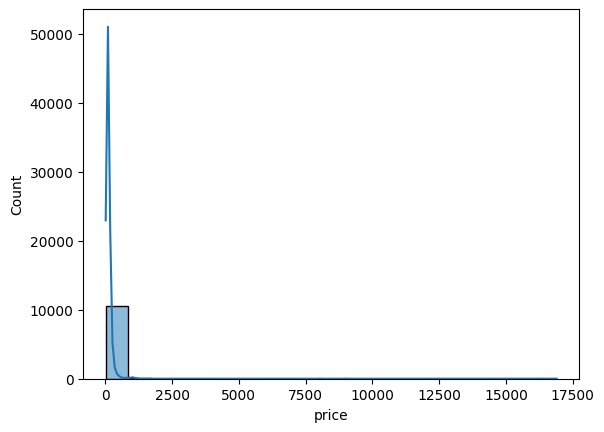

In [121]:
# price
sns.histplot(df['price'], bins=20, kde=True);

<Axes: >

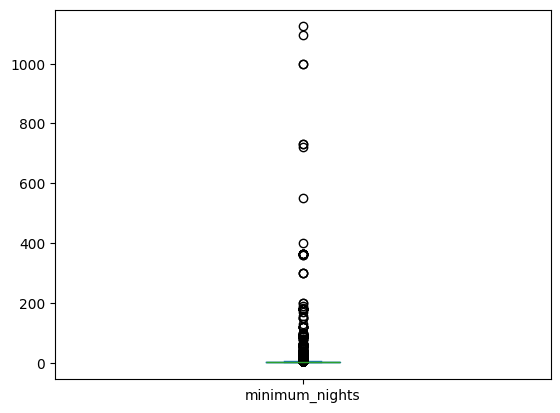

In [122]:
# minimum_nights

df['minimum_nights'].plot(kind='box')

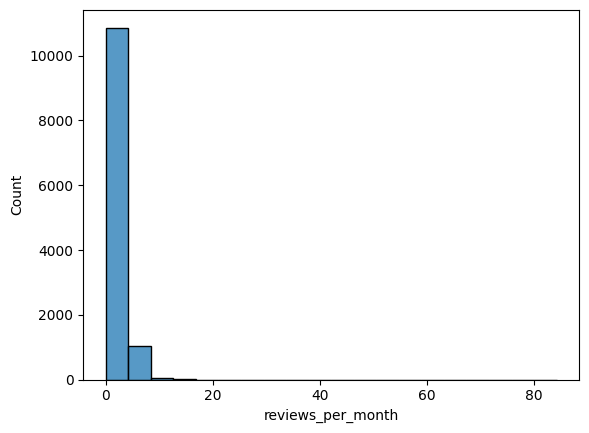

In [123]:
sns.histplot(df['reviews_per_month'], bins=20, kde=False);

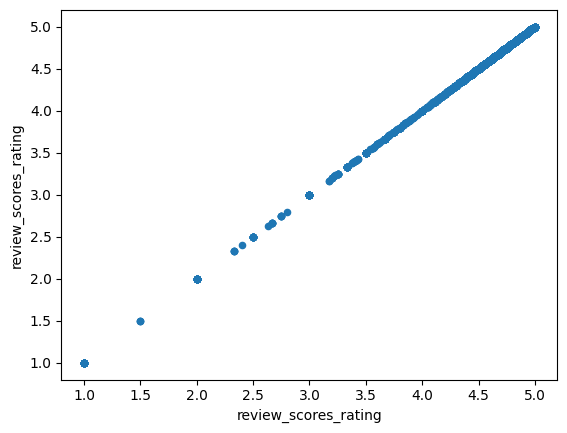

In [124]:
# review_scores_rating vs review_scores_accuracy

df.plot(kind='scatter', x='review_scores_rating', y='review_scores_rating');

Some features has to be proceed by droping outliers which disturb visualizations. fe. price, minimum_nights, number_of_reviews, reviews_per_month.


## Data Cleansing

In [125]:
# limit for displaying rows
pd.set_option('display.max_rows', 20 )

### Missing data treatment #2

In [126]:
# diplaying empty values
df_na = df.isna().sum()
df_na[df_na > 0].sort_values(ascending=False)


beds                           3794
price                          3785
host_response_time             3642
host_response_rate             3642
host_acceptance_rate           3125
review_scores_value            2419
reviews_per_month              2418
review_scores_rating           2418
review_scores_accuracy         2418
review_scores_cleanliness      2418
review_scores_checkin          2418
review_scores_communication    2418
review_scores_location         2418
last_review                    2418
bedrooms                       1441
bathrooms_num                     3
host_since                        1
dtype: int64

In [127]:
# filling with most intuitive value
df[['bathrooms_num', 'bedrooms']] = df[['bathrooms_num', 'bedrooms']].fillna(1)
df['beds'] = df['beds'].fillna(df['accommodates'])  

In [128]:
# filling datetime columns with most frequent value (mode)
dt_cols = df.select_dtypes(include='datetime').columns.to_list()
dt_cols

for col in dt_cols:
    df[col] = df[col].fillna(df[col].mode().iloc[0])  

In [129]:
# all other features will be imputed with median (for numeric columns) or most frequent value (for categorical columns) using SimpleImputer

from sklearn.impute import SimpleImputer

numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['category']).columns

numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to numeric columns in dataframe
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [130]:
# check if empty values has been imputed
df_na = df.isna().sum()
df_na[df_na > 0].sort_values(ascending=False)

Series([], dtype: int64)

### Getting rid of outliers

In [131]:
# IQR Method (Inter-Quartile Range)

def iqr_cut(s):
    iqr = s.quantile(0.75) - s.quantile(0.25)
    limits = ((s.quantile(0.25) - 1.5 * iqr), (s.quantile(0.75) + 1.5 * iqr))
    return iqr, limits 

Price:

In [132]:
df['price'].describe().round(2)

count    14396.00
mean       119.27
std        271.51
min         12.00
25%         78.00
50%         95.00
75%        115.00
max      16900.00
Name: price, dtype: float64

(12845, 38)


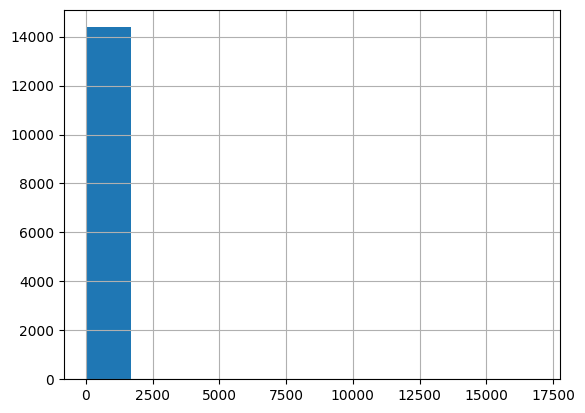

In [133]:
# price range narrowing
feat_series = df['price']

iqrs = iqr_cut(feat_series)
iqr = iqrs[0]
limits = iqrs[1]
limit_btm = limits[0]
limit_top = limits[1]   
iqr, limit_btm, limit_top

# getting rid of outliers
df = df[(feat_series >= limit_btm) & (feat_series < limit_top)]

print(df.shape)

feat_series.hist();



In [134]:
df['price'].agg(['skew', 'kurtosis'])

skew        0.198148
kurtosis    0.246160
Name: price, dtype: float64

Minimum_nights


In [135]:
df['minimum_nights'].describe().round(2)

count    12845.00
mean         7.33
std         29.20
min          1.00
25%          1.00
50%          2.00
75%          3.00
max       1125.00
Name: minimum_nights, dtype: float64

In [136]:
# we prune values higher than 20 days
outl_thresh= 20
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: x if x < outl_thresh else outl_thresh)

<Axes: >

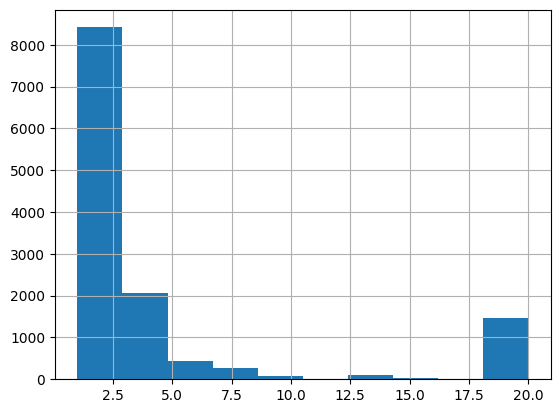

In [137]:
df['minimum_nights'].hist()


Reviews per month

In [138]:
df['reviews_per_month'].describe()

count    12845.000000
mean         1.509186
std          1.883954
min          0.010000
25%          0.330000
50%          0.930000
75%          2.000000
max         84.180000
Name: reviews_per_month, dtype: float64

In [139]:
# check outliers with 3 sigma method
outl_thresh= int(df['reviews_per_month'].mean() + 3 * df['reviews_per_month'].std())
print(f"Upper limit for 'reviews_per_month' with 3 sigma method is: {outl_thresh}")

Upper limit for 'reviews_per_month' with 3 sigma method is: 7


In [140]:
# set outliers to threshold value (calculated with 3 sigma method)
df['reviews_per_month'] = df['reviews_per_month'].apply(lambda x: x if x < outl_thresh else outl_thresh)

<Axes: >

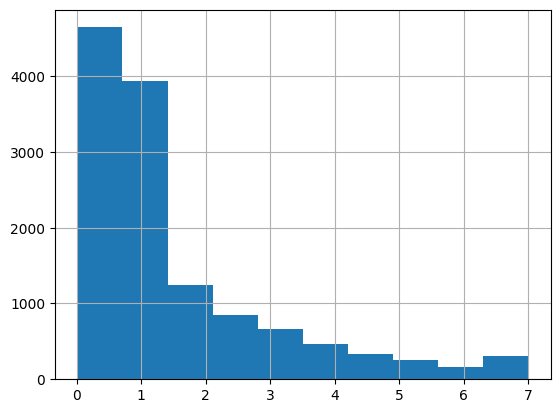

In [141]:
df['reviews_per_month'].hist()

Reviews ratings

In [142]:
# columns with ratings
# we assume the 'review_scores_rating' as main review column
rating_cols =['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location', 'review_scores_value']

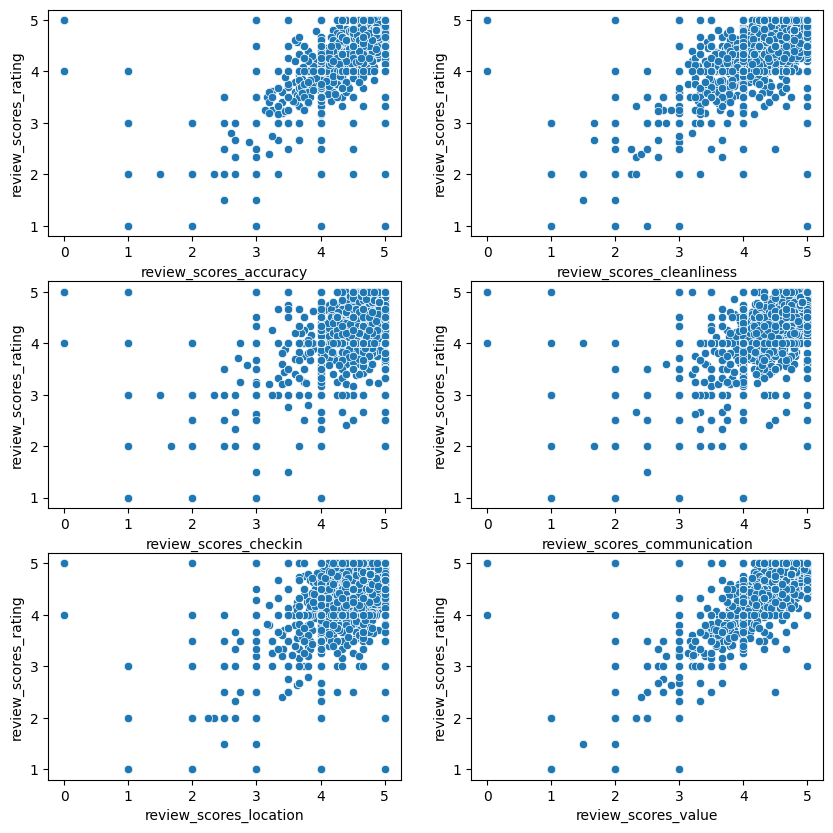

In [143]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
#fig.tight_layout()
k = 0
for i in range(3):
  for j in range(2):
    sns.scatterplot(data=df, x=rating_cols[k], y='review_scores_rating', ax=ax[i, j])
    k += 1

As most of ratings distibutes in similar way, and only particular values are lower than 3,0 we'll set these lower values as 3,0.

In [144]:
rating_cols.append('review_scores_rating')

for col in rating_cols:
    df[f"{col}_clipped"] = df[col].apply(lambda x: x if x > 3.0 else 3.0)

### New features


Price range

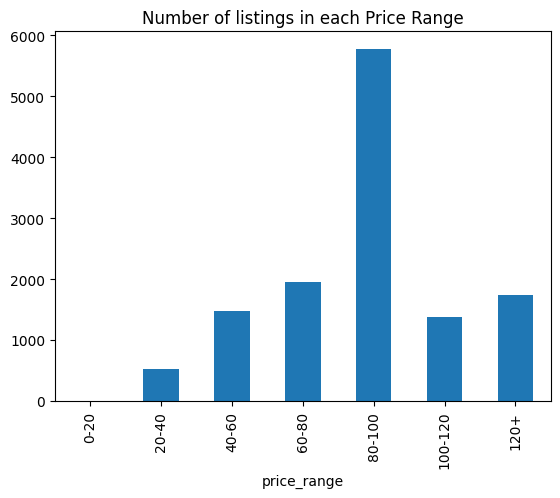

In [145]:
# create column price_range

price_range = pd.cut(df['price'],
                     bins=[0, 20, 40, 60, 80, 100, 120, df['price'].max()],
                     labels=['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120+'])

df['price_range'] = price_range
df['price_range'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of listings in each Price Range")
plt.show()

Price per bed

In [146]:
# price per accomodate

df['price_per_accommodate'] = df['price']/df['accommodates']

df['price_per_accommodate'].describe()

count    12845.000000
mean        33.350986
std         17.292789
min          1.750000
25%         21.250000
50%         29.750000
75%         47.500000
max        170.000000
Name: price_per_accommodate, dtype: float64

## Data correlation 

## Data scaling

In [147]:
# preparing for scaling numerical values

# these columns we don't want to scale
omit_cols =['id', 'latitude', 'longitude', 'calculated_host_listings_count' ]
omit_cols.extend(rating_cols)

df_numeric_only = df.select_dtypes(include='number').drop(columns = omit_cols)  # choose numeric columns only
unique_counts_mask = df_numeric_only.nunique()            # mask for filtering dataframe
df_subset = df_numeric_only.loc[:, unique_counts_mask > 2]  # choose columns that are not binary
df_subset = df_subset.loc[:, ~df_subset.apply(lambda val: val.between(0,1).all())]  # choose columns which not contains only values in range (0,1) 
cols_sub = df_subset.columns.to_list()  # list of dataframe columns
df_subset


,price,accommodates,beds,bedrooms,bathrooms_num,minimum_nights,availability_30,availability_60,availability_90,number_of_reviews,reviews_per_month,review_scores_accuracy_clipped,review_scores_cleanliness_clipped,review_scores_checkin_clipped,review_scores_communication_clipped,review_scores_location_clipped,review_scores_value_clipped,review_scores_rating_clipped,price_per_accommodate
0,100.0,5.0,3.0,1.0,1.0,20.0,0.0,28.0,58.0,390.0,2.38,4.81,4.64,4.91,4.94,4.77,4.69,4.74,20.000000
1,169.0,4.0,3.0,2.0,1.0,1.0,0.0,27.0,57.0,217.0,1.26,4.91,4.89,4.90,4.94,4.61,4.72,4.86,42.250000
2,80.0,2.0,2.0,0.0,1.0,20.0,4.0,13.0,43.0,380.0,2.29,4.78,4.52,4.92,4.95,4.87,4.59,4.67,40.000000
3,50.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,116.0,0.71,4.74,4.68,4.80,4.76,4.81,4.72,4.77,25.000000
4,60.0,4.0,2.0,1.0,1.0,1.0,9.0,32.0,59.0,178.0,1.09,4.58,4.50,4.55,4.43,4.41,4.47,4.35,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,90.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.93,4.86,4.80,4.91,4.91,4.77,4.74,4.80,22.500000
14392,136.0,9.0,6.0,3.0,1.0,1.0,29.0,59.0,89.0,0.0,0.93,4.86,4.80,4.91,4.91,4.77,4.74,4.80,15.111111
14393,46.0,3.0,2.0,1.0,1.0,1.0,30.0,30.0,30.0,0.0,0.93,4.86,4.80,4.91,4.91,4.77,4.74,4.80,15.333333
14394,75.0,2.0,1.0,1.0,1.0,2.0,27.0,57.0,87.0,0.0,0.93,4.86,4.80,4.91,4.91,4.77,4.74,4.80,37.500000


In [148]:
# scaling numerical features

from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

for col in cols_sub:
    df_subset[f"{col}_std"] = ssc.fit_transform(df_subset[[col]])
    df
    # print(df[f"{col}_std"].aggregate(['mean', 'std'])) 

df_subset = df_subset.drop(columns=cols_sub)  # dropping non-standarized columns
df_subset

,price_std,accommodates_std,beds_std,bedrooms_std,bathrooms_num_std,minimum_nights_std,availability_30_std,availability_60_std,availability_90_std,number_of_reviews_std,reviews_per_month_std,review_scores_accuracy_clipped_std,review_scores_cleanliness_clipped_std,review_scores_checkin_clipped_std,review_scores_communication_clipped_std,review_scores_location_clipped_std,review_scores_value_clipped_std,review_scores_rating_clipped_std,price_per_accommodate_std
0,0.309111,1.042333,0.590178,-0.323396,-0.385074,2.651234,-0.875982,0.331380,0.688122,4.400263,0.567330,0.117336,-0.140159,0.265767,0.393156,0.241093,0.085733,0.076762,-0.772085
1,2.753300,0.435463,0.590178,1.195998,-0.385074,-0.539868,-0.875982,0.283255,0.657614,2.214970,-0.136162,0.428088,0.538489,0.230581,0.393156,-0.259928,0.171605,0.426739,0.514628
2,-0.399349,-0.778277,-0.134706,-1.842790,-0.385074,2.651234,-0.460246,-0.390489,0.230507,4.273946,0.510799,0.024110,-0.465910,0.300952,0.426602,0.554232,-0.200505,-0.127392,0.384511
3,-1.462040,-0.778277,-0.134706,-0.323396,2.322986,-0.371915,-0.875982,-1.016109,-1.081323,0.939162,-0.481627,-0.100191,-0.031575,-0.121274,-0.208869,0.366349,0.171605,0.164256,-0.482936
4,-1.107810,0.435463,-0.134706,-0.323396,-0.385074,-0.539868,0.059423,0.523878,0.718630,1.722331,-0.242942,-0.597395,-0.520202,-1.000913,-1.312582,-0.886205,-0.543990,-1.060664,-1.061234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,-0.045119,0.435463,-0.134706,-0.323396,-0.385074,-0.539868,-0.875982,-1.016109,-1.081323,-0.526121,-0.343441,0.272712,0.294175,0.265767,0.292818,0.241093,0.228852,0.251750,-0.627511
14392,1.584340,3.469813,2.764829,2.715392,-0.385074,-0.539868,2.138101,1.823241,1.633860,-0.526121,-0.343441,0.272712,0.294175,0.265767,0.292818,0.241093,0.228852,0.251750,-1.054809
14393,-1.603732,-0.171407,-0.134706,-0.323396,-0.385074,-0.539868,2.242035,0.427629,-0.166093,-0.526121,-0.343441,0.272712,0.294175,0.265767,0.292818,0.241093,0.228852,0.251750,-1.041958
14394,-0.576465,-0.778277,-0.859590,-0.323396,-0.385074,-0.371915,1.930234,1.726992,1.572845,-0.526121,-0.343441,0.272712,0.294175,0.265767,0.292818,0.241093,0.228852,0.251750,0.239937


### Correlation matrix

In [149]:
# Pearson correlation coefficient
corr = df_subset.corr()

In [150]:
corr

,price_std,accommodates_std,beds_std,bedrooms_std,bathrooms_num_std,minimum_nights_std,availability_30_std,availability_60_std,availability_90_std,number_of_reviews_std,reviews_per_month_std,review_scores_accuracy_clipped_std,review_scores_cleanliness_clipped_std,review_scores_checkin_clipped_std,review_scores_communication_clipped_std,review_scores_location_clipped_std,review_scores_value_clipped_std,review_scores_rating_clipped_std,price_per_accommodate_std
price_std,1.000000,0.295523,0.192406,0.259398,0.057329,-0.029319,0.019723,0.023947,0.024201,-0.075181,-0.151339,0.092328,0.128817,0.041665,0.036769,0.132108,0.068786,0.110383,0.334748
accommodates_std,0.295523,1.000000,0.700356,0.583021,0.172931,-0.109883,0.119835,0.138489,0.149163,0.042325,0.108368,-0.079085,-0.037809,-0.030963,-0.061667,-0.085815,-0.057883,-0.075363,-0.638699
beds_std,0.192406,0.700356,1.000000,0.550558,0.242621,-0.059947,-0.114358,-0.145987,-0.158459,-0.031681,-0.076759,-0.011716,-0.020460,0.018986,0.009215,-0.013849,0.010210,-0.012679,-0.408994
bedrooms_std,0.259398,0.583021,0.550558,1.000000,0.327771,-0.016175,-0.006231,-0.021421,-0.021488,-0.041034,-0.006793,-0.022664,-0.010491,0.011806,-0.004529,-0.021262,-0.005536,-0.015021,-0.260396
bathrooms_num_std,0.057329,0.172931,0.242621,0.327771,1.000000,0.062227,-0.037540,-0.050090,-0.048261,0.005040,-0.022969,0.018063,0.007629,0.011079,0.022434,0.013235,0.017897,0.018070,-0.065117
minimum_nights_std,-0.029319,-0.109883,-0.059947,-0.016175,0.062227,1.000000,-0.090817,-0.095988,-0.090701,-0.064906,-0.203185,0.084928,0.088582,0.054542,0.060916,0.100918,0.048855,0.095843,0.074475
availability_30_std,0.019723,0.119835,-0.114358,-0.006231,-0.037540,-0.090817,1.000000,0.919699,0.848777,-0.050817,0.078777,-0.202483,-0.142583,-0.126562,-0.155102,-0.173801,-0.206229,-0.203565,-0.116500
availability_60_std,0.023947,0.138489,-0.145987,-0.021421,-0.050090,-0.095988,0.919699,1.000000,0.973498,-0.006961,0.137972,-0.186812,-0.114628,-0.116167,-0.150588,-0.162422,-0.191591,-0.186833,-0.136802
availability_90_std,0.024201,0.149163,-0.158459,-0.021488,-0.048261,-0.090701,0.848777,0.973498,1.000000,0.015505,0.170404,-0.177726,-0.099297,-0.111107,-0.146630,-0.157145,-0.184583,-0.177668,-0.149405
number_of_reviews_std,-0.075181,0.042325,-0.031681,-0.041034,0.005040,-0.064906,-0.050817,-0.006961,0.015505,1.000000,0.523460,0.078420,0.085360,0.069748,0.060757,0.056375,0.085016,0.069272,-0.106839


<Axes: >

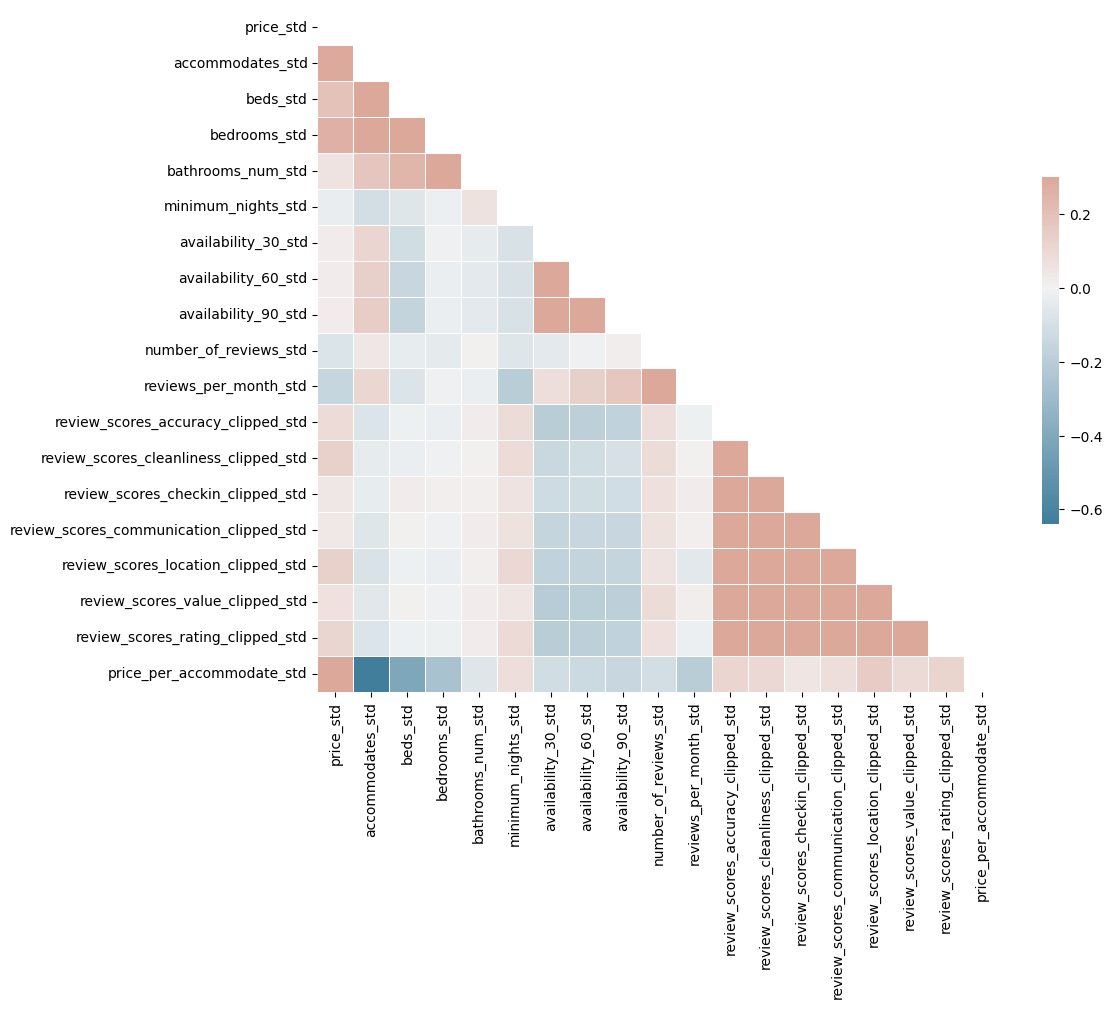

In [151]:
# correlation heatmap


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

According to above heating map it's enough to show only one of review ratings features fe. 'review_scores_rating'.

## Additional lookup

### Check most popular amenities

In [152]:
# pick top 20 most frequent amenity types

amenity_types = []

for i in df['amenities']:
    amenity_types += i
amenity_types_freq = dict((x, amenity_types.count(x)) for x in set(amenity_types))
amenity_types_freq = pd.DataFrame.from_dict(amenity_types_freq, orient="index")
amenity_types_freq.reset_index(inplace=True)
amenity_types_freq.columns = ["amenity", "frequency"]
amenity_types_freq = amenity_types_freq.sort_values(by="frequency", ascending=False)

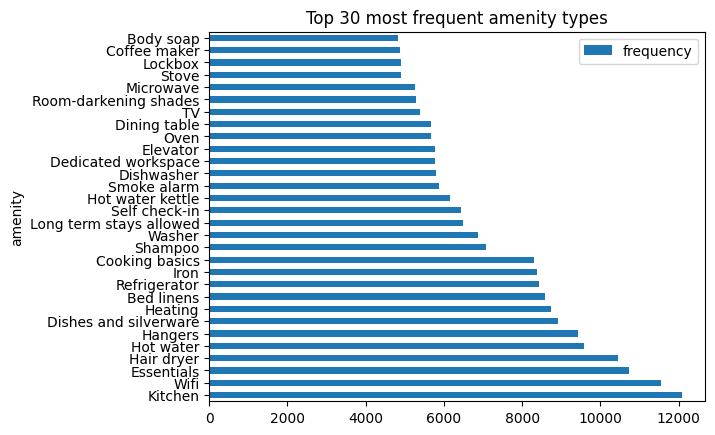

In [153]:
top_n = 30
amenity_types_freq.head(top_n).plot.barh(x="amenity", y="frequency")
plt.title(f"Top {top_n} most frequent amenity types")
plt.show()

### Geoplot


In [154]:
# !pip install geopandas folium contextily

<Axes: xlabel='longitude', ylabel='latitude'>

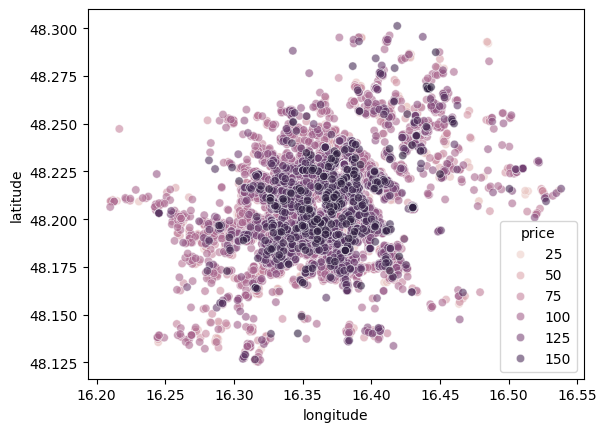

In [155]:
import plotly.graph_objects as go
from plotly.offline import plot as plotoffline
import seaborn as sns
# Create data subset
geodf = df[['latitude', 'longitude', 'price', 'price_range']]
geodf = geodf.sort_values("price", ascending=True) # This sorting is necessary for the color scale to work properly.
geodf.describe()
# Simple scatter plot
sns.scatterplot(x="longitude",
                y="latitude",
                hue="price",
                data=geodf,
                alpha=0.6)

Displaying map with geopandas

In [156]:
import os
import geopandas as gpd
from shapely.geometry import Point

In [157]:
# convert geodata to GeoDataFrame object
gdf = gpd.GeoDataFrame(
    geodf,
    geometry=[Point(xy) for xy in zip(geodf['longitude'], geodf['latitude'])],
    crs="EPSG:4326"
)

# Load of Vienna map shapefile
currdir = os.getcwd()
vienna_map = gpd.read_file(f"{currdir}\\vienna_map_shapefiles\\BEZIRKSGRENZEOGDPolygon.shp")

vienna_map = vienna_map.to_crs(epsg=4326)

# check the Coordinate Reference System (CRS)

print("Vienna Map CRS:", vienna_map.crs)
print("Points CRS:", gdf.crs)


Vienna Map CRS: EPSG:4326
Points CRS: EPSG:4326


Text(0.5, 1.0, 'Vienna AirBnb properties')

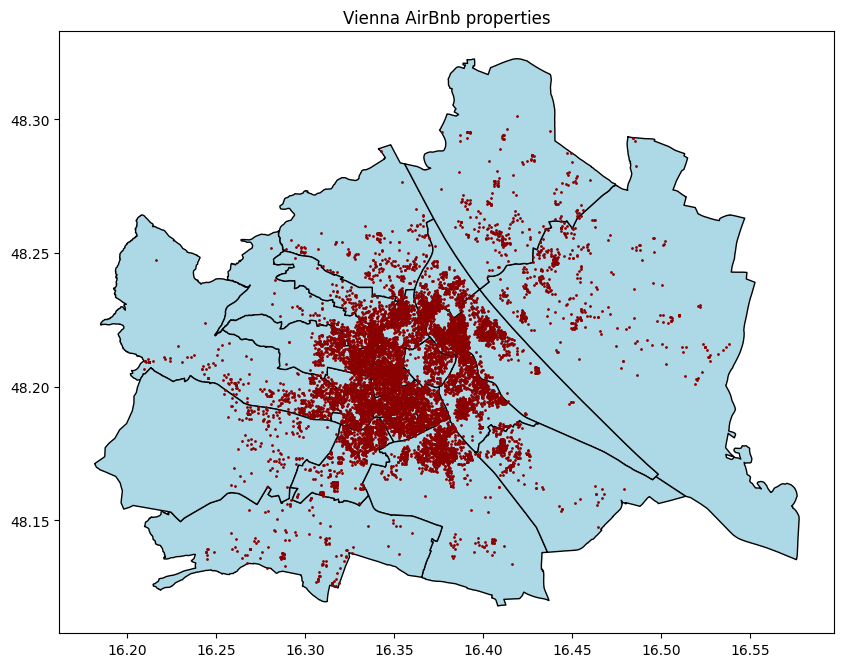

In [158]:
# map displaying
ax = vienna_map.plot(color='lightblue', edgecolor='black', figsize=(10,8))

gdf.plot(ax=ax, color='darkred', markersize=1)  # applying points on map
ax.set_title("Vienna AirBnb properties", fontsize=12)